In [65]:
"""
This project is a solution to final task
Created on: 25-05-2020
Created by: Amiya Ranjan Rout
"""

import pandas as pd
import numpy as np
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pickle
pd.set_option('display.max_columns', 50)

In [120]:
myDataFrame = pd.read_csv("student-math.csv", sep=";")
myDataFrame.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [67]:
# Task 2.1.1
# Converting all object data type into numeric values using LabelEncoder
# And also print for which values what the values are assigned that will be helpful during deployment time
category_col =['school', 'sex', 'address', 'famsize', 'Pstatus', 
               'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid' , 'activities',
              'nursery', 'higher', 'internet', 'romantic']  
labelEncoder = preprocessing.LabelEncoder()
mapping_dict ={}
for col in category_col: 
    myDataFrame[col] = labelEncoder.fit_transform(myDataFrame[col]) 
    
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'school': {'GP': 0, 'MS': 1}, 'sex': {'F': 0, 'M': 1}, 'address': {'R': 0, 'U': 1}, 'famsize': {'GT3': 0, 'LE3': 1}, 'Pstatus': {'A': 0, 'T': 1}, 'Mjob': {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}, 'Fjob': {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}, 'reason': {'course': 0, 'home': 1, 'other': 2, 'reputation': 3}, 'guardian': {'father': 0, 'mother': 1, 'other': 2}, 'schoolsup': {'no': 0, 'yes': 1}, 'famsup': {'no': 0, 'yes': 1}, 'paid': {'no': 0, 'yes': 1}, 'activities': {'no': 0, 'yes': 1}, 'nursery': {'no': 0, 'yes': 1}, 'higher': {'no': 0, 'yes': 1}, 'internet': {'no': 0, 'yes': 1}, 'romantic': {'no': 0, 'yes': 1}}


In [68]:
# Task 2.1.2
# Creating a column final_grade
myDataFrame['final_grade'] = myDataFrame['G1'] + myDataFrame['G2'] + myDataFrame['G3']

In [69]:
# Task 2.1.3
# y variable contain the output column, i.e., final_grade
y = myDataFrame[['final_grade']]

In [70]:
# Task 2.1.4
# x which shall contain every other column except “G3” and the target variable
x = myDataFrame.drop(['final_grade', 'G3'], axis=1)
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10


In [71]:
# Task 2.1.5

# Let us break x and y DF into training set and test set
from sklearn.model_selection import train_test_split

# Split x and y into training and test set in 75:25 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [72]:
# Task 2.2.1
# Creating a linear regression model by using sklearn.linear_model library
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

In [73]:
# Task 2.2.2
# Fit the model with the x_train and y_train values 
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
# Task 2.2.3
# Calculating the accuracy by using the score attribute 
print(regression_model.score(x_test, y_test))

0.956398447314234


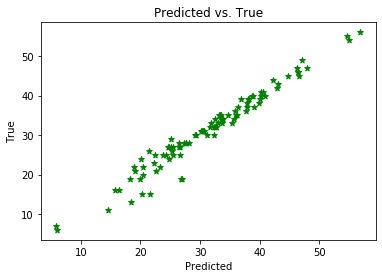

In [75]:
# Task 2.2.4
# Using predict attribute predict the values of all x_test
y_pred = regression_model.predict(x_test)

# Ploting a scatter plot between the true and predicted values of x_test.
plt.title("Predicted vs. True")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.scatter(y_pred, y_test, label= "stars", color= "green",  
            marker= "*")

In [76]:
# Saving model to disk 
# This will help in deploy the model
pickle.dump(regression_model, open('model.pkl','wb'))

In [77]:
# Task 2.2.5
# building the optimal model using backward elimination
# SL = 0.05 and eliminating those features which have p > SL

import statsmodels.regression.linear_model as sm 
x = np.append(arr = np.ones((395, 1)).astype(int),  
              values = x, axis = 1) 
x_opt = x[:, :] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     413.6
Date:                Fri, 29 May 2020   Prob (F-statistic):          6.74e-264
Time:                        11:32:40   Log-Likelihood:                -794.26
No. Observations:                 395   AIC:                             1655.
Df Residuals:                     362   BIC:                             1786.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3293      1.906     -0.173      0.863      -4.078       3.419
x1             0.4705      0.357      1.319      0.188      -0.231       1.172
x2             0.1495      0.229      0.653      0.514      -0.301       0.600
x3            -0.2005      0.095     -2.099      0.036      -0.388      -0.013
x4             0.0283      0.262      0.108      0.914      -0.487       0.544
x5             0.0309      0.222      0.139      0.889      -0.407       0.468
x6            -0.1500      0.330     -0.454      0.650      -0.800       0.500
x7             0.1292      0.129      0.999      0.319      -0.125       0.383
x8            -0.1267      0.120     -1.059      0.290      -0.362       0.109
x9             0.0198      0.094      0.212      0.833      -0.164       0.204
x10           -0.1146      0.118     -0.972      0.332      -0.346       0.117
x11            0.0731      0.083      0.876      0.382      -0.091       0.237
x12            0.0831      0.196      0.424      0.672      -0.303       0.469
x13            0.1041      0.153      0.679      0.498      -0.198       0.406
x14           -0.1118      0.131     -0.856      0.392      -0.369       0.145
x15           -0.2076      0.152     -1.368      0.172      -0.506       0.091
x16            0.4921      0.312      1.576      0.116      -0.122       1.106
x17            0.1587      0.220      0.722      0.471      -0.273       0.591
x18            0.0574      0.217      0.264      0.792      -0.370       0.485
x19           -0.3722      0.202     -1.842      0.066      -0.770       0.025
x20           -0.2242      0.248     -0.904      0.366      -0.712       0.263
x21            0.0995      0.484      0.205      0.837      -0.853       1.052
x22           -0.2026      0.281     -0.722      0.471      -0.754       0.349
x23           -0.2668      0.216     -1.237      0.217      -0.691       0.157
x24            0.3518      0.112      3.154      0.002       0.132       0.571
x25            0.0526      0.107      0.490      0.624      -0.159       0.264
x26            0.0277      0.103      0.270      0.788      -0.174       0.230
x27           -0.1780      0.147     -1.213      0.226      -0.467       0.111
x28            0.1697      0.111      1.529      0.127      -0.049       0.388
x29            0.0706      0.073      0.971      0.332      -0.072       0.214
x30            0.0440      0.013      3.356      0.001       0.018       0.070
x31            1.1889      0.059     20.018      0.000       1.072       1.306
x32            1.9566      0.052     37.603      0.000       1.854       2.059
==============================================================================
Omnibus:                      183.131   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              842.643
Sk

In [78]:
# remove the 4th column as it has the highest value 
x_opt = x[:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     428.1
Date:                Fri, 29 May 2020   Prob (F-statistic):          3.25e-265
Time:                        11:32:40   Log-Likelihood:                -794.26
No. Observations:                 395   AIC:                             1653.
Df Residuals:                     363   BIC:                             1780.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3005      1.885     -0.159      0.873      -4.007       3.406
x1             0.4624      0.348      1.328      0.185      -0.222       1.147
x2             0.1483      0.228      0.649      0.517      -0.301       0.597
x3            -0.2005      0.095     -2.103      0.036      -0.388      -0.013
x4             0.0335      0.221      0.151      0.880      -0.401       0.468
x5            -0.1505      0.330     -0.456      0.648      -0.799       0.498
x6             0.1298      0.129      1.006      0.315      -0.124       0.384
x7            -0.1273      0.119     -1.066      0.287      -0.362       0.107
x8             0.0200      0.093      0.215      0.830      -0.164       0.204
x9            -0.1144      0.118     -0.972      0.332      -0.346       0.117
x10            0.0723      0.083      0.871      0.384      -0.091       0.236
x11            0.0823      0.196      0.420      0.675      -0.303       0.467
x12            0.1000      0.148      0.674      0.501      -0.192       0.392
x13           -0.1133      0.130     -0.874      0.383      -0.368       0.142
x14           -0.2079      0.151     -1.372      0.171      -0.506       0.090
x15            0.4921      0.312      1.578      0.115      -0.121       1.105
x16            0.1582      0.219      0.721      0.471      -0.273       0.590
x17            0.0580      0.217      0.267      0.789      -0.368       0.484
x18           -0.3741      0.201     -1.862      0.063      -0.769       0.021
x19           -0.2242      0.248     -0.905      0.366      -0.711       0.263
x20            0.1000      0.484      0.207      0.836      -0.851       1.051
x21           -0.1981      0.277     -0.715      0.475      -0.743       0.347
x22           -0.2659      0.215     -1.236      0.217      -0.689       0.157
x23            0.3516      0.111      3.157      0.002       0.133       0.571
x24            0.0528      0.107      0.493      0.622      -0.158       0.264
x25            0.0290      0.102      0.285      0.776      -0.172       0.230
x26           -0.1784      0.147     -1.217      0.224      -0.466       0.110
x27            0.1687      0.110      1.527      0.128      -0.049       0.386
x28            0.0703      0.073      0.969      0.333      -0.072       0.213
x29            0.0439      0.013      3.360      0.001       0.018       0.070
x30            1.1886      0.059     20.056      0.000       1.072       1.305
x31            1.9570      0.052     37.762      0.000       1.855       2.059
==============================================================================
Omnibus:                      182.920   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              840.630
Skew:                          -2.021   Prob(JB):                    2.88e-183
Ku

In [79]:
# remove the 5th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     443.6
Date:                Fri, 29 May 2020   Prob (F-statistic):          1.55e-266
Time:                        11:32:41   Log-Likelihood:                -794.28
No. Observations:                 395   AIC:                             1651.
Df Residuals:                     364   BIC:                             1774.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2882      1.880     -0.153      0.878      -3.986       3.410
x1             0.4643      0.347      1.336      0.182      -0.219       1.148
x2             0.1492      0.228      0.655      0.513      -0.299       0.597
x3            -0.2004      0.095     -2.105      0.036      -0.388      -0.013
x4            -0.1576      0.326     -0.483      0.629      -0.799       0.484
x5             0.1284      0.129      0.999      0.319      -0.124       0.381
x6            -0.1279      0.119     -1.073      0.284      -0.362       0.106
x7             0.0216      0.093      0.233      0.816      -0.161       0.204
x8            -0.1163      0.117     -0.995      0.320      -0.346       0.114
x9             0.0721      0.083      0.870      0.385      -0.091       0.235
x10            0.0818      0.196      0.418      0.676      -0.303       0.466
x11            0.1011      0.148      0.683      0.495      -0.190       0.392
x12           -0.1143      0.129     -0.884      0.377      -0.369       0.140
x13           -0.2085      0.151     -1.378      0.169      -0.506       0.089
x14            0.4923      0.311      1.581      0.115      -0.120       1.105
x15            0.1562      0.219      0.714      0.476      -0.274       0.586
x16            0.0579      0.217      0.267      0.789      -0.368       0.484
x17           -0.3733      0.201     -1.861      0.064      -0.768       0.021
x18           -0.2200      0.246     -0.895      0.371      -0.703       0.263
x19            0.1001      0.483      0.207      0.836      -0.850       1.050
x20           -0.1978      0.277     -0.715      0.475      -0.742       0.346
x21           -0.2641      0.215     -1.231      0.219      -0.686       0.158
x22            0.3516      0.111      3.161      0.002       0.133       0.570
x23            0.0525      0.107      0.490      0.624      -0.158       0.263
x24            0.0291      0.102      0.286      0.775      -0.171       0.229
x25           -0.1776      0.146     -1.214      0.225      -0.465       0.110
x26            0.1695      0.110      1.539      0.125      -0.047       0.386
x27            0.0699      0.072      0.965      0.335      -0.073       0.212
x28            0.0439      0.013      3.366      0.001       0.018       0.070
x29            1.1887      0.059     20.087      0.000       1.072       1.305
x30            1.9573      0.052     37.850      0.000       1.856       2.059
==============================================================================
Omnibus:                      183.028   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              842.626
Skew:                          -2.021   Prob(JB):                    1.06e-183
Kurtosis:                       8.904   Cond. No.                         511.
==

In [80]:
# remove the 19th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     455.7
Date:                Fri, 29 May 2020   Prob (F-statistic):          4.00e-267
Time:                        11:32:41   Log-Likelihood:                -796.15
No. Observations:                 395   AIC:                             1652.
Df Residuals:                     365   BIC:                             1772.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2400      1.887     -0.127      0.899      -3.950       3.470
x1             0.5150      0.348      1.482      0.139      -0.168       1.198
x2             0.0982      0.227      0.432      0.666      -0.348       0.545
x3            -0.1946      0.095     -2.038      0.042      -0.382      -0.007
x4            -0.2257      0.325     -0.694      0.488      -0.865       0.414
x5             0.1282      0.129      0.995      0.321      -0.125       0.382
x6            -0.1445      0.119     -1.213      0.226      -0.379       0.090
x7             0.0130      0.093      0.140      0.889      -0.170       0.196
x8            -0.1181      0.117     -1.007      0.314      -0.349       0.112
x9             0.0543      0.083      0.657      0.511      -0.108       0.217
x10            0.0768      0.196      0.391      0.696      -0.309       0.463
x11            0.0845      0.148      0.570      0.569      -0.207       0.376
x12           -0.1384      0.129     -1.072      0.284      -0.392       0.115
x13           -0.2049      0.152     -1.351      0.178      -0.503       0.093
x14            0.4659      0.312      1.493      0.136      -0.148       1.080
x15            0.1776      0.219      0.810      0.418      -0.253       0.608
x16            0.0728      0.217      0.335      0.738      -0.354       0.500
x17           -0.2021      0.246     -0.820      0.413      -0.687       0.282
x18            0.0266      0.483      0.055      0.956      -0.923       0.977
x19           -0.1923      0.278     -0.693      0.489      -0.738       0.354
x20           -0.2878      0.215     -1.339      0.181      -0.710       0.135
x21            0.3520      0.112      3.154      0.002       0.133       0.571
x22            0.0360      0.107      0.336      0.737      -0.174       0.246
x23            0.0198      0.102      0.194      0.847      -0.181       0.220
x24           -0.1571      0.146     -1.074      0.284      -0.445       0.131
x25            0.1708      0.111      1.545      0.123      -0.047       0.388
x26            0.0673      0.073      0.926      0.355      -0.076       0.210
x27            0.0436      0.013      3.336      0.001       0.018       0.069
x28            1.1907      0.059     20.055      0.000       1.074       1.307
x29            1.9561      0.052     37.703      0.000       1.854       2.058
==============================================================================
Omnibus:                      186.711   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              882.637
Skew:                          -2.058   Prob(JB):                    2.18e-192
Kurtosis:                       9.057   Cond. No.                         511.
==============================================================================

W

In [81]:
# remove the 18th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,20,21,22,23,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     473.1
Date:                Fri, 29 May 2020   Prob (F-statistic):          1.93e-268
Time:                        11:32:41   Log-Likelihood:                -796.21
No. Observations:                 395   AIC:                             1650.
Df Residuals:                     366   BIC:                             1766.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2654      1.883     -0.141      0.888      -3.968       3.437
x1             0.5209      0.347      1.502      0.134      -0.161       1.203
x2             0.0912      0.226      0.404      0.686      -0.353       0.535
x3            -0.1944      0.095     -2.038      0.042      -0.382      -0.007
x4            -0.2182      0.324     -0.674      0.501      -0.855       0.419
x5             0.1301      0.129      1.011      0.313      -0.123       0.383
x6            -0.1461      0.119     -1.228      0.220      -0.380       0.088
x7             0.0146      0.093      0.157      0.875      -0.168       0.197
x8            -0.1198      0.117     -1.024      0.306      -0.350       0.110
x9             0.0562      0.082      0.682      0.496      -0.106       0.218
x10            0.0828      0.195      0.424      0.672      -0.301       0.467
x11            0.0824      0.148      0.557      0.578      -0.208       0.373
x12           -0.1354      0.129     -1.052      0.293      -0.388       0.118
x13           -0.2115      0.150     -1.408      0.160      -0.507       0.084
x14            0.4599      0.311      1.478      0.140      -0.152       1.072
x15            0.1966      0.211      0.930      0.353      -0.219       0.612
x16           -0.1943      0.245     -0.793      0.428      -0.676       0.287
x17            0.0424      0.480      0.088      0.930      -0.902       0.987
x18           -0.1834      0.276     -0.665      0.507      -0.726       0.359
x19           -0.2867      0.215     -1.336      0.182      -0.709       0.135
x20            0.3535      0.111      3.175      0.002       0.135       0.573
x21            0.0336      0.107      0.315      0.753      -0.176       0.243
x22            0.0188      0.102      0.185      0.853      -0.182       0.219
x23           -0.1544      0.146     -1.058      0.291      -0.441       0.133
x24            0.1752      0.110      1.599      0.111      -0.040       0.391
x25            0.0660      0.072      0.911      0.363      -0.076       0.208
x26            0.0434      0.013      3.328      0.001       0.018       0.069
x27            1.1887      0.059     20.146      0.000       1.073       1.305
x28            1.9579      0.052     37.991      0.000       1.857       2.059
==============================================================================
Omnibus:                      187.206   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              887.402
Skew:                          -2.064   Prob(JB):                    2.01e-193
Kurtosis:                       9.073   Cond. No.                         510.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [82]:
# remove the 17th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,20,21,22,23,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     490.7
Date:                Fri, 29 May 2020   Prob (F-statistic):          1.33e-269
Time:                        11:32:41   Log-Likelihood:                -796.67
No. Observations:                 395   AIC:                             1649.
Df Residuals:                     367   BIC:                             1761.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1720      1.880     -0.092      0.927      -3.868       3.524
x1             0.4831      0.344      1.403      0.161      -0.194       1.160
x2             0.0669      0.224      0.298      0.766      -0.374       0.508
x3            -0.1981      0.095     -2.079      0.038      -0.385      -0.011
x4            -0.2025      0.323     -0.626      0.532      -0.839       0.434
x5             0.1396      0.128      1.088      0.277      -0.113       0.392
x6            -0.1326      0.118     -1.123      0.262      -0.365       0.100
x7             0.0129      0.093      0.139      0.890      -0.169       0.195
x8            -0.1247      0.117     -1.067      0.287      -0.354       0.105
x9             0.0607      0.082      0.738      0.461      -0.101       0.222
x10            0.0881      0.195      0.452      0.652      -0.295       0.472
x11            0.0956      0.147      0.649      0.517      -0.194       0.385
x12           -0.1231      0.128     -0.963      0.336      -0.375       0.128
x13           -0.2117      0.150     -1.409      0.160      -0.507       0.084
x14            0.4646      0.311      1.493      0.136      -0.147       1.077
x15           -0.1931      0.245     -0.788      0.431      -0.675       0.289
x16            0.0585      0.480      0.122      0.903      -0.885       1.002
x17           -0.1670      0.275     -0.606      0.545      -0.708       0.374
x18           -0.2890      0.215     -1.347      0.179      -0.711       0.133
x19            0.3498      0.111      3.144      0.002       0.131       0.569
x20            0.0409      0.106      0.384      0.701      -0.168       0.250
x21            0.0155      0.102      0.152      0.879      -0.185       0.216
x22           -0.1487      0.146     -1.020      0.308      -0.435       0.138
x23            0.1705      0.109      1.557      0.120      -0.045       0.386
x24            0.0698      0.072      0.966      0.335      -0.072       0.212
x25            0.0435      0.013      3.333      0.001       0.018       0.069
x26            1.1837      0.059     20.148      0.000       1.068       1.299
x27            1.9585      0.052     38.012      0.000       1.857       2.060
==============================================================================
Omnibus:                      187.163   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              884.439
Skew:                          -2.065   Prob(JB):                    8.84e-193
Kurtosis:                       9.057   Cond. No.                         509.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# remove the 16th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,7,8,9,10,11,12,13,14,15,20,21,22,23,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     507.8
Date:                Fri, 29 May 2020   Prob (F-statistic):          1.77e-270
Time:                        11:32:41   Log-Likelihood:                -797.87
No. Observations:                 395   AIC:                             1650.
Df Residuals:                     368   BIC:                             1757.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5068      1.827      0.277      0.782      -3.086       4.099
x1             0.4561      0.344      1.325      0.186      -0.221       1.133
x2             0.0376      0.224      0.168      0.867      -0.402       0.478
x3            -0.2276      0.093     -2.438      0.015      -0.411      -0.044
x4            -0.2125      0.324     -0.656      0.512      -0.850       0.424
x5             0.1226      0.128      0.958      0.339      -0.129       0.374
x6            -0.1159      0.118     -0.985      0.325      -0.347       0.116
x7             0.0112      0.093      0.121      0.904      -0.171       0.194
x8            -0.1244      0.117     -1.063      0.289      -0.355       0.106
x9             0.0616      0.082      0.749      0.454      -0.100       0.223
x10            0.0858      0.195      0.439      0.661      -0.298       0.470
x11            0.1006      0.147      0.682      0.496      -0.189       0.391
x12           -0.1154      0.128     -0.901      0.368      -0.367       0.136
x13           -0.2089      0.150     -1.389      0.166      -0.505       0.087
x14           -0.1812      0.245     -0.739      0.460      -0.663       0.301
x15            0.0688      0.481      0.143      0.886      -0.876       1.014
x16           -0.1798      0.276     -0.652      0.515      -0.722       0.362
x17           -0.3063      0.215     -1.427      0.154      -0.728       0.116
x18            0.3541      0.111      3.178      0.002       0.135       0.573
x19            0.0421      0.107      0.395      0.693      -0.167       0.252
x20            0.0149      0.102      0.146      0.884      -0.186       0.215
x21           -0.1294      0.145     -0.890      0.374      -0.415       0.157
x22            0.1547      0.109      1.418      0.157      -0.060       0.369
x23            0.0642      0.072      0.888      0.375      -0.078       0.206
x24            0.0449      0.013      3.447      0.001       0.019       0.071
x25            1.1661      0.058     20.227      0.000       1.053       1.280
x26            1.9654      0.051     38.237      0.000       1.864       2.066
==============================================================================
Omnibus:                      189.133   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              912.391
Skew:                          -2.081   Prob(JB):                    7.53e-199
Kurtosis:                       9.173   Cond. No.                         494.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# remove the 7th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,8,9,10,11,12,13,14,15,20,21,22,23,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     528.2
Date:                Fri, 29 May 2020   Prob (F-statistic):          1.20e-271
Time:                        11:32:41   Log-Likelihood:                -798.36
No. Observations:                 395   AIC:                             1649.
Df Residuals:                     369   BIC:                             1752.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6505      1.821      0.357      0.721      -2.929       4.231
x1             0.4461      0.344      1.296      0.196      -0.231       1.123
x2             0.0500      0.223      0.224      0.823      -0.389       0.489
x3            -0.2338      0.093     -2.511      0.012      -0.417      -0.051
x4            -0.2288      0.323     -0.707      0.480      -0.865       0.407
x5            -0.0550      0.099     -0.555      0.579      -0.250       0.140
x6             0.0431      0.087      0.498      0.619      -0.127       0.213
x7            -0.1237      0.117     -1.057      0.291      -0.354       0.106
x8             0.0676      0.082      0.824      0.411      -0.094       0.229
x9             0.0988      0.195      0.507      0.612      -0.284       0.482
x10            0.0962      0.147      0.653      0.514      -0.194       0.386
x11           -0.1079      0.128     -0.844      0.399      -0.359       0.143
x12           -0.2187      0.150     -1.457      0.146      -0.514       0.076
x13           -0.1624      0.244     -0.664      0.507      -0.643       0.318
x14            0.0765      0.480      0.159      0.874      -0.868       1.021
x15           -0.1699      0.275     -0.617      0.538      -0.712       0.372
x16           -0.2902      0.214     -1.356      0.176      -0.711       0.130
x17            0.3514      0.111      3.155      0.002       0.132       0.570
x18            0.0422      0.107      0.396      0.693      -0.167       0.252
x19            0.0245      0.101      0.241      0.810      -0.175       0.224
x20           -0.1231      0.145     -0.848      0.397      -0.409       0.163
x21            0.1474      0.109      1.354      0.176      -0.067       0.361
x22            0.0596      0.072      0.825      0.410      -0.082       0.201
x23            0.0459      0.013      3.536      0.000       0.020       0.071
x24            1.1650      0.058     20.214      0.000       1.052       1.278
x25            1.9685      0.051     38.377      0.000       1.868       2.069
==============================================================================
Omnibus:                      189.241   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              913.508
Skew:                          -2.082   Prob(JB):                    4.31e-199
Kurtosis:                       9.177   Cond. No.                         490.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# remove the 14th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,8,9,10,11,12,13,15,20,21,22,23,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     550.6
Date:                Fri, 29 May 2020   Prob (F-statistic):          7.23e-273
Time:                        11:32:41   Log-Likelihood:                -798.74
No. Observations:                 395   AIC:                             1647.
Df Residuals:                     370   BIC:                             1747.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5715      1.817      0.314      0.753      -3.002       4.145
x1             0.4734      0.342      1.382      0.168      -0.200       1.147
x2             0.0938      0.217      0.432      0.666      -0.333       0.521
x3            -0.2403      0.093     -2.590      0.010      -0.423      -0.058
x4            -0.2365      0.323     -0.732      0.465      -0.872       0.399
x5            -0.0486      0.099     -0.492      0.623      -0.243       0.146
x6             0.0418      0.087      0.483      0.629      -0.128       0.212
x7            -0.1199      0.117     -1.026      0.306      -0.350       0.110
x8             0.0608      0.082      0.745      0.457      -0.100       0.221
x9             0.1001      0.195      0.514      0.608      -0.283       0.483
x10            0.0994      0.147      0.675      0.500      -0.190       0.389
x11           -0.2081      0.150     -1.392      0.165      -0.502       0.086
x12           -0.1726      0.244     -0.707      0.480      -0.652       0.307
x13            0.0396      0.478      0.083      0.934      -0.901       0.980
x14           -0.1829      0.275     -0.665      0.506      -0.723       0.358
x15           -0.3001      0.214     -1.405      0.161      -0.720       0.120
x16            0.3488      0.111      3.135      0.002       0.130       0.568
x17            0.0497      0.106      0.468      0.640      -0.159       0.258
x18            0.0190      0.101      0.188      0.851      -0.180       0.218
x19           -0.1254      0.145     -0.864      0.388      -0.411       0.160
x20            0.1584      0.108      1.467      0.143      -0.054       0.371
x21            0.0590      0.072      0.818      0.414      -0.083       0.201
x22            0.0470      0.013      3.639      0.000       0.022       0.072
x23            1.1616      0.057     20.212      0.000       1.049       1.275
x24            1.9684      0.051     38.390      0.000       1.868       2.069
==============================================================================
Omnibus:                      191.296   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              944.510
Skew:                          -2.099   Prob(JB):                    7.99e-206
Kurtosis:                       9.306   Cond. No.                         488.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# remove the 13th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,8,9,10,11,12,15,20,21,22,23,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     575.4
Date:                Fri, 29 May 2020   Prob (F-statistic):          3.74e-274
Time:                        11:32:41   Log-Likelihood:                -798.99
No. Observations:                 395   AIC:                             1646.
Df Residuals:                     371   BIC:                             1741.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8335      1.774      0.470      0.639      -2.655       4.322
x1             0.5253      0.334      1.575      0.116      -0.131       1.181
x2             0.1010      0.217      0.466      0.642      -0.325       0.527
x3            -0.2460      0.092     -2.664      0.008      -0.428      -0.064
x4            -0.2357      0.323     -0.730      0.466      -0.871       0.399
x5            -0.0573      0.098     -0.586      0.558      -0.250       0.135
x6             0.0377      0.086      0.437      0.662      -0.132       0.207
x7            -0.1136      0.116     -0.975      0.330      -0.343       0.115
x8             0.0598      0.082      0.733      0.464      -0.101       0.220
x9             0.1007      0.195      0.517      0.605      -0.282       0.483
x10           -0.2075      0.149     -1.389      0.166      -0.501       0.086
x11           -0.1671      0.244     -0.686      0.493      -0.646       0.312
x12            0.0302      0.478      0.063      0.950      -0.909       0.969
x13           -0.1914      0.274     -0.697      0.486      -0.731       0.348
x14           -0.3000      0.213     -1.406      0.161      -0.720       0.120
x15            0.3502      0.111      3.150      0.002       0.132       0.569
x16            0.0457      0.106      0.431      0.666      -0.162       0.254
x17            0.0186      0.101      0.184      0.854      -0.180       0.217
x18           -0.1190      0.145     -0.822      0.412      -0.404       0.166
x19            0.1621      0.108      1.503      0.134      -0.050       0.374
x20            0.0582      0.072      0.807      0.420      -0.084       0.200
x21            0.0472      0.013      3.653      0.000       0.022       0.073
x22            1.1656      0.057     20.405      0.000       1.053       1.278
x23            1.9633      0.051     38.744      0.000       1.864       2.063
==============================================================================
Omnibus:                      191.070   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              941.171
Skew:                          -2.097   Prob(JB):                    4.24e-205
Kurtosis:                       9.292   Cond. No.                         476.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# remove the 12th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,8,9,10,11,15,20,21,22,23,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     602.7
Date:                Fri, 29 May 2020   Prob (F-statistic):          1.72e-275
Time:                        11:32:41   Log-Likelihood:                -799.13
No. Observations:                 395   AIC:                             1644.
Df Residuals:                     372   BIC:                             1736.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7493      1.765      0.425      0.671      -2.721       4.220
x1             0.5089      0.332      1.534      0.126      -0.143       1.161
x2             0.0973      0.216      0.450      0.653      -0.328       0.523
x3            -0.2348      0.090     -2.619      0.009      -0.411      -0.058
x4            -0.2532      0.321     -0.789      0.430      -0.884       0.378
x5            -0.0616      0.097     -0.633      0.527      -0.253       0.130
x6             0.0410      0.086      0.477      0.633      -0.128       0.210
x7            -0.1167      0.116     -1.005      0.316      -0.345       0.112
x8             0.0589      0.081      0.723      0.470      -0.101       0.219
x9            -0.1989      0.148     -1.341      0.181      -0.491       0.093
x10           -0.1771      0.243     -0.730      0.466      -0.654       0.300
x11            0.0480      0.476      0.101      0.920      -0.888       0.984
x12           -0.1988      0.274     -0.726      0.468      -0.737       0.339
x13           -0.2954      0.213     -1.387      0.166      -0.714       0.123
x14            0.3513      0.111      3.163      0.002       0.133       0.570
x15            0.0482      0.106      0.456      0.648      -0.159       0.256
x16            0.0206      0.101      0.204      0.839      -0.178       0.219
x17           -0.1193      0.145     -0.825      0.410      -0.404       0.165
x18            0.1582      0.107      1.473      0.142      -0.053       0.369
x19            0.0557      0.072      0.775      0.439      -0.086       0.197
x20            0.0479      0.013      3.732      0.000       0.023       0.073
x21            1.1669      0.057     20.467      0.000       1.055       1.279
x22            1.9623      0.051     38.790      0.000       1.863       2.062
==============================================================================
Omnibus:                      192.161   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              955.147
Skew:                          -2.108   Prob(JB):                    3.91e-208
Kurtosis:                       9.345   Cond. No.                         473.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# remove the 11th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,8,9,10,15,20,21,22,23,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     632.2
Date:                Fri, 29 May 2020   Prob (F-statistic):          8.76e-277
Time:                        11:32:41   Log-Likelihood:                -799.41
No. Observations:                 395   AIC:                             1643.
Df Residuals:                     373   BIC:                             1730.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8071      1.762      0.458      0.647      -2.658       4.272
x1             0.4906      0.330      1.484      0.139      -0.159       1.141
x2             0.0871      0.216      0.404      0.687      -0.337       0.511
x3            -0.2341      0.090     -2.612      0.009      -0.410      -0.058
x4            -0.2457      0.320     -0.767      0.444      -0.876       0.384
x5            -0.0603      0.097     -0.620      0.536      -0.252       0.131
x6             0.0428      0.086      0.498      0.619      -0.126       0.212
x7            -0.1201      0.116     -1.035      0.301      -0.348       0.108
x8            -0.1992      0.148     -1.343      0.180      -0.491       0.092
x9            -0.1714      0.242     -0.707      0.480      -0.648       0.305
x10            0.0561      0.476      0.118      0.906      -0.879       0.991
x11           -0.1985      0.274     -0.726      0.468      -0.737       0.339
x12           -0.2924      0.213     -1.374      0.170      -0.711       0.126
x13            0.3522      0.111      3.174      0.002       0.134       0.570
x14            0.0464      0.106      0.440      0.660      -0.161       0.254
x15            0.0182      0.101      0.180      0.857      -0.180       0.216
x16           -0.1199      0.145     -0.829      0.407      -0.404       0.164
x17            0.1594      0.107      1.485      0.138      -0.052       0.371
x18            0.0485      0.071      0.682      0.496      -0.091       0.188
x19            0.0488      0.013      3.822      0.000       0.024       0.074
x20            1.1668      0.057     20.480      0.000       1.055       1.279
x21            1.9642      0.050     38.904      0.000       1.865       2.063
==============================================================================
Omnibus:                      193.579   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              972.225
Skew:                          -2.122   Prob(JB):                    7.66e-212
Kurtosis:                       9.408   Cond. No.                         472.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
# remove the 10th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,8,9,15,20,21,22,23,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     663.6
Date:                Fri, 29 May 2020   Prob (F-statistic):          5.73e-278
Time:                        11:32:41   Log-Likelihood:                -799.97
No. Observations:                 395   AIC:                             1642.
Df Residuals:                     374   BIC:                             1726.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5003      1.737      0.288      0.774      -2.916       3.916
x1             0.4758      0.330      1.441      0.150      -0.174       1.125
x2             0.0816      0.216      0.378      0.705      -0.343       0.506
x3            -0.2291      0.089     -2.560      0.011      -0.405      -0.053
x4            -0.2664      0.320     -0.833      0.406      -0.895       0.363
x5            -0.0781      0.096     -0.815      0.416      -0.266       0.110
x6             0.0274      0.085      0.325      0.746      -0.139       0.194
x7            -0.2058      0.148     -1.389      0.166      -0.497       0.085
x8            -0.1555      0.242     -0.643      0.521      -0.631       0.320
x9             0.0991      0.474      0.209      0.834      -0.832       1.031
x10           -0.1877      0.273     -0.687      0.493      -0.725       0.350
x11           -0.2970      0.213     -1.396      0.164      -0.715       0.121
x12            0.3469      0.111      3.129      0.002       0.129       0.565
x13            0.0573      0.105      0.545      0.586      -0.149       0.264
x14            0.0177      0.101      0.176      0.861      -0.181       0.216
x15           -0.1250      0.144     -0.865      0.387      -0.409       0.159
x16            0.1554      0.107      1.448      0.148      -0.056       0.366
x17            0.0521      0.071      0.733      0.464      -0.088       0.192
x18            0.0488      0.013      3.824      0.000       0.024       0.074
x19            1.1666      0.057     20.474      0.000       1.055       1.279
x20            1.9627      0.050     38.887      0.000       1.863       2.062
==============================================================================
Omnibus:                      196.067   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1002.069
Skew:                          -2.148   Prob(JB):                    2.53e-218
Kurtosis:                       9.514   Cond. No.                         464.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# remove the 15th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,8,9,20,21,22,23,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     696.7
Date:                Fri, 29 May 2020   Prob (F-statistic):          5.60e-279
Time:                        11:32:41   Log-Likelihood:                -800.99
No. Observations:                 395   AIC:                             1642.
Df Residuals:                     375   BIC:                             1722.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4494      1.739      0.258      0.796      -2.970       3.869
x1             0.4931      0.330      1.492      0.136      -0.157       1.143
x2             0.0735      0.216      0.341      0.734      -0.351       0.498
x3            -0.2478      0.089     -2.797      0.005      -0.422      -0.074
x4            -0.2483      0.320     -0.776      0.438      -0.878       0.381
x5            -0.0576      0.095     -0.608      0.543      -0.244       0.129
x6             0.0272      0.085      0.321      0.748      -0.139       0.194
x7            -0.1416      0.242     -0.585      0.559      -0.618       0.334
x8             0.2195      0.466      0.471      0.638      -0.697       1.136
x9            -0.1852      0.274     -0.677      0.499      -0.724       0.353
x10           -0.3070      0.213     -1.442      0.150      -0.726       0.112
x11            0.3569      0.111      3.222      0.001       0.139       0.575
x12            0.0478      0.105      0.456      0.649      -0.158       0.254
x13            0.0135      0.101      0.134      0.894      -0.185       0.212
x14           -0.1317      0.145     -0.911      0.363      -0.416       0.153
x15            0.1547      0.107      1.440      0.151      -0.057       0.366
x16            0.0475      0.071      0.668      0.504      -0.092       0.187
x17            0.0487      0.013      3.809      0.000       0.024       0.074
x18            1.1746      0.057     20.691      0.000       1.063       1.286
x19            1.9676      0.050     39.029      0.000       1.868       2.067
==============================================================================
Omnibus:                      195.408   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              974.658
Skew:                          -2.151   Prob(JB):                    2.27e-212
Kurtosis:                       9.381   Cond. No.                         463.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# remove the 20th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,8,9,21,22,23,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     736.7
Date:                Fri, 29 May 2020   Prob (F-statistic):          2.41e-280
Time:                        11:32:41   Log-Likelihood:                -801.17
No. Observations:                 395   AIC:                             1640.
Df Residuals:                     376   BIC:                             1716.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3097      1.721      0.180      0.857      -3.074       3.694
x1             0.5022      0.330      1.523      0.129      -0.146       1.151
x2             0.0715      0.216      0.332      0.740      -0.353       0.496
x3            -0.2459      0.088     -2.780      0.006      -0.420      -0.072
x4            -0.2363      0.319     -0.741      0.459      -0.864       0.391
x5            -0.0637      0.094     -0.677      0.499      -0.249       0.121
x6             0.0241      0.084      0.285      0.776      -0.142       0.190
x7             0.2178      0.466      0.467      0.640      -0.698       1.134
x8            -0.1788      0.273     -0.654      0.513      -0.716       0.359
x9            -0.3122      0.213     -1.469      0.143      -0.730       0.106
x10            0.3578      0.111      3.233      0.001       0.140       0.575
x11            0.0490      0.105      0.467      0.641      -0.157       0.255
x12            0.0101      0.101      0.100      0.920      -0.188       0.208
x13           -0.1293      0.144     -0.895      0.371      -0.413       0.155
x14            0.1587      0.107      1.482      0.139      -0.052       0.369
x15            0.0481      0.071      0.678      0.498      -0.091       0.188
x16            0.0485      0.013      3.802      0.000       0.023       0.074
x17            1.1745      0.057     20.708      0.000       1.063       1.286
x18            1.9671      0.050     39.059      0.000       1.868       2.066
==============================================================================
Omnibus:                      195.173   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              972.856
Skew:                          -2.148   Prob(JB):                    5.59e-212
Kurtosis:                       9.376   Cond. No.                         459.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# remove the 21th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,8,9,22,23,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     781.7
Date:                Fri, 29 May 2020   Prob (F-statistic):          9.47e-282
Time:                        11:32:41   Log-Likelihood:                -801.28
No. Observations:                 395   AIC:                             1639.
Df Residuals:                     377   BIC:                             1710.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6032      1.601      0.377      0.707      -2.544       3.751
x1             0.5126      0.329      1.560      0.120      -0.134       1.159
x2             0.0528      0.212      0.249      0.803      -0.364       0.469
x3            -0.2533      0.087     -2.913      0.004      -0.424      -0.082
x4            -0.2393      0.319     -0.751      0.453      -0.866       0.387
x5            -0.0592      0.093     -0.633      0.527      -0.243       0.125
x6             0.0274      0.084      0.326      0.745      -0.138       0.193
x7            -0.1814      0.273     -0.665      0.507      -0.718       0.355
x8            -0.3204      0.212     -1.514      0.131      -0.736       0.096
x9             0.3600      0.110      3.260      0.001       0.143       0.577
x10            0.0469      0.105      0.448      0.654      -0.159       0.253
x11            0.0117      0.101      0.117      0.907      -0.186       0.209
x12           -0.1274      0.144     -0.884      0.377      -0.411       0.156
x13            0.1576      0.107      1.473      0.142      -0.053       0.368
x14            0.0484      0.071      0.683      0.495      -0.091       0.188
x15            0.0484      0.013      3.797      0.000       0.023       0.073
x16            1.1764      0.057     20.822      0.000       1.065       1.288
x17            1.9674      0.050     39.112      0.000       1.869       2.066
==============================================================================
Omnibus:                      194.768   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              962.082
Skew:                          -2.147   Prob(JB):                    1.22e-209
Kurtosis:                       9.326   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
# remove the 22th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,8,9,23,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     831.7
Date:                Fri, 29 May 2020   Prob (F-statistic):          4.03e-283
Time:                        11:32:41   Log-Likelihood:                -801.52
No. Observations:                 395   AIC:                             1637.
Df Residuals:                     378   BIC:                             1705.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4539      1.584      0.287      0.775      -2.660       3.568
x1             0.5300      0.327      1.619      0.106      -0.114       1.174
x2             0.0510      0.212      0.241      0.810      -0.365       0.467
x3            -0.2479      0.087     -2.866      0.004      -0.418      -0.078
x4            -0.2656      0.316     -0.840      0.401      -0.887       0.356
x5            -0.0624      0.093     -0.669      0.504      -0.246       0.121
x6             0.0169      0.082      0.205      0.838      -0.145       0.179
x7            -0.3396      0.209     -1.621      0.106      -0.752       0.072
x8             0.3567      0.110      3.235      0.001       0.140       0.573
x9             0.0461      0.105      0.441      0.659      -0.159       0.252
x10            0.0063      0.100      0.063      0.950      -0.191       0.203
x11           -0.1304      0.144     -0.906      0.366      -0.414       0.153
x12            0.1593      0.107      1.490      0.137      -0.051       0.369
x13            0.0534      0.070      0.758      0.449      -0.085       0.192
x14            0.0476      0.013      3.754      0.000       0.023       0.073
x15            1.1791      0.056     20.934      0.000       1.068       1.290
x16            1.9637      0.050     39.317      0.000       1.865       2.062
==============================================================================
Omnibus:                      195.058   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              964.447
Skew:                          -2.150   Prob(JB):                    3.74e-210
Kurtosis:                       9.333   Cond. No.                         421.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# remove the 23th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,8,9,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     883.2
Date:                Fri, 29 May 2020   Prob (F-statistic):          4.93e-284
Time:                        11:32:42   Log-Likelihood:                -802.88
No. Observations:                 395   AIC:                             1638.
Df Residuals:                     379   BIC:                             1701.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5555      1.586      0.350      0.726      -2.563       3.674
x1             0.5223      0.328      1.592      0.112      -0.123       1.167
x2             0.0756      0.211      0.358      0.721      -0.340       0.491
x3            -0.2640      0.086     -3.065      0.002      -0.433      -0.095
x4            -0.2496      0.317     -0.788      0.431      -0.872       0.373
x5            -0.0702      0.093     -0.751      0.453      -0.254       0.113
x6             0.0243      0.083      0.295      0.768      -0.138       0.187
x7             0.3704      0.110      3.363      0.001       0.154       0.587
x8             0.0418      0.105      0.399      0.690      -0.164       0.248
x9             0.0078      0.100      0.078      0.938      -0.189       0.205
x10           -0.1355      0.144     -0.939      0.348      -0.419       0.148
x11            0.1656      0.107      1.548      0.123      -0.045       0.376
x12            0.0475      0.071      0.674      0.501      -0.091       0.186
x13            0.0450      0.013      3.573      0.000       0.020       0.070
x14            1.1703      0.056     20.830      0.000       1.060       1.281
x15            1.9740      0.050     39.761      0.000       1.876       2.072
==============================================================================
Omnibus:                      197.388   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              989.256
Skew:                          -2.176   Prob(JB):                    1.53e-215
Kurtosis:                       9.416   Cond. No.                         420.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# remove the 9th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,8,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     948.5
Date:                Fri, 29 May 2020   Prob (F-statistic):          1.64e-285
Time:                        11:32:42   Log-Likelihood:                -802.93
No. Observations:                 395   AIC:                             1636.
Df Residuals:                     380   BIC:                             1696.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5837      1.581      0.369      0.712      -2.525       3.692
x1             0.5202      0.328      1.588      0.113      -0.124       1.164
x2             0.0859      0.208      0.412      0.681      -0.324       0.496
x3            -0.2643      0.086     -3.073      0.002      -0.433      -0.095
x4            -0.2521      0.316     -0.798      0.426      -0.873       0.369
x5            -0.0640      0.091     -0.704      0.482      -0.243       0.115
x6             0.3708      0.110      3.371      0.001       0.155       0.587
x7             0.0443      0.104      0.424      0.671      -0.161       0.249
x8             0.0077      0.100      0.076      0.939      -0.189       0.205
x9            -0.1323      0.144     -0.921      0.358      -0.415       0.150
x10            0.1625      0.106      1.527      0.127      -0.047       0.372
x11            0.0484      0.070      0.688      0.492      -0.090       0.187
x12            0.0453      0.013      3.607      0.000       0.021       0.070
x13            1.1696      0.056     20.860      0.000       1.059       1.280
x14            1.9748      0.050     39.886      0.000       1.877       2.072
==============================================================================
Omnibus:                      197.403   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              989.965
Skew:                          -2.176   Prob(JB):                    1.08e-215
Kurtosis:                       9.420   Cond. No.                         418.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# remove the 8th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,24,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1023.
Date:                Fri, 29 May 2020   Prob (F-statistic):          6.44e-287
Time:                        11:32:42   Log-Likelihood:                -803.19
No. Observations:                 395   AIC:                             1634.
Df Residuals:                     381   BIC:                             1690.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3137      1.533      0.205      0.838      -2.700       3.328
x1             0.5206      0.327      1.590      0.113      -0.123       1.164
x2             0.0832      0.208      0.400      0.690      -0.326       0.493
x3            -0.2550      0.085     -3.002      0.003      -0.422      -0.088
x4            -0.2354      0.315     -0.747      0.455      -0.855       0.384
x5             0.3708      0.110      3.373      0.001       0.155       0.587
x6             0.0476      0.104      0.457      0.648      -0.157       0.252
x7             0.0007      0.100      0.007      0.995      -0.195       0.197
x8            -0.1354      0.144     -0.943      0.346      -0.418       0.147
x9             0.1649      0.106      1.553      0.121      -0.044       0.374
x10            0.0472      0.070      0.672      0.502      -0.091       0.185
x11            0.0449      0.013      3.581      0.000       0.020       0.070
x12            1.1649      0.056     20.941      0.000       1.055       1.274
x13            1.9755      0.049     39.935      0.000       1.878       2.073
==============================================================================
Omnibus:                      197.877   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              998.477
Skew:                          -2.179   Prob(JB):                    1.53e-217
Kurtosis:                       9.455   Cond. No.                         403.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# remove the 24th column as it has the highest value 
x_opt = x[:, [0,1,2,3,6,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1078.
Date:                Fri, 29 May 2020   Prob (F-statistic):          5.19e-286
Time:                        11:32:42   Log-Likelihood:                -809.00
No. Observations:                 395   AIC:                             1644.
Df Residuals:                     382   BIC:                             1696.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1199      1.535      0.730      0.466      -1.897       4.137
x1             0.4449      0.331      1.344      0.180      -0.206       1.096
x2             0.1260      0.211      0.598      0.550      -0.288       0.540
x3            -0.2286      0.086     -2.668      0.008      -0.397      -0.060
x4            -0.2234      0.319     -0.700      0.484      -0.851       0.404
x5             0.0917      0.105      0.877      0.381      -0.114       0.298
x6             0.0288      0.101      0.286      0.775      -0.169       0.227
x7            -0.1515      0.145     -1.043      0.298      -0.437       0.134
x8             0.1207      0.107      1.130      0.259      -0.089       0.331
x9             0.0702      0.071      0.989      0.323      -0.069       0.210
x10            0.0437      0.013      3.443      0.001       0.019       0.069
x11            1.1714      0.056     20.790      0.000       1.061       1.282
x12            1.9702      0.050     39.318      0.000       1.872       2.069
==============================================================================
Omnibus:                      199.615   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1019.672
Skew:                          -2.197   Prob(JB):                    3.81e-222
Kurtosis:                       9.530   Cond. No.                         394.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# remove the 6th column as it has the highest value 
x_opt = x[:, [0,1,2,3,25,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1177.
Date:                Fri, 29 May 2020   Prob (F-statistic):          1.89e-287
Time:                        11:32:42   Log-Likelihood:                -809.25
No. Observations:                 395   AIC:                             1642.
Df Residuals:                     383   BIC:                             1690.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9536      1.515      0.629      0.529      -2.025       3.932
x1             0.4411      0.331      1.334      0.183      -0.209       1.091
x2             0.1244      0.210      0.591      0.555      -0.289       0.538
x3            -0.2309      0.086     -2.698      0.007      -0.399      -0.063
x4             0.0893      0.105      0.855      0.393      -0.116       0.295
x5             0.0300      0.101      0.298      0.766      -0.168       0.228
x6            -0.1462      0.145     -1.008      0.314      -0.431       0.139
x7             0.1174      0.107      1.101      0.272      -0.092       0.327
x8             0.0696      0.071      0.982      0.327      -0.070       0.209
x9             0.0449      0.013      3.570      0.000       0.020       0.070
x10            1.1703      0.056     20.793      0.000       1.060       1.281
x11            1.9717      0.050     39.413      0.000       1.873       2.070
==============================================================================
Omnibus:                      199.371   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1018.220
Skew:                          -2.194   Prob(JB):                    7.88e-222
Kurtosis:                       9.528   Cond. No.                         389.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# remove the 25th column as it has the highest value 
x_opt = x[:, [0,1,2,3,26,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1296.
Date:                Fri, 29 May 2020   Prob (F-statistic):          7.35e-289
Time:                        11:32:42   Log-Likelihood:                -809.63
No. Observations:                 395   AIC:                             1641.
Df Residuals:                     384   BIC:                             1685.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1592      1.495      0.775      0.439      -1.781       4.099
x1             0.4503      0.330      1.363      0.174      -0.199       1.100
x2             0.1588      0.206      0.769      0.442      -0.247       0.565
x3            -0.2327      0.086     -2.721      0.007      -0.401      -0.065
x4             0.0531      0.097      0.549      0.584      -0.137       0.244
x5            -0.1294      0.144     -0.901      0.368      -0.412       0.153
x6             0.1088      0.106      1.025      0.306      -0.100       0.317
x7             0.0727      0.071      1.027      0.305      -0.066       0.212
x8             0.0444      0.013      3.532      0.000       0.020       0.069
x9             1.1727      0.056     20.871      0.000       1.062       1.283
x10            1.9703      0.050     39.420      0.000       1.872       2.069
==============================================================================
Omnibus:                      199.571   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.058
Skew:                          -2.195   Prob(JB):                    1.16e-222
Kurtosis:                       9.544   Cond. No.                         380.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# remove the 26th column as it has the highest value 
x_opt = x[:, [0,1,2,3,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1443.
Date:                Fri, 29 May 2020   Prob (F-statistic):          2.19e-290
Time:                        11:32:42   Log-Likelihood:                -809.78
No. Observations:                 395   AIC:                             1640.
Df Residuals:                     385   BIC:                             1679.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2404      1.487      0.834      0.405      -1.682       4.163
x1             0.4350      0.329      1.322      0.187      -0.212       1.082
x2             0.1562      0.206      0.757      0.449      -0.249       0.562
x3            -0.2284      0.085     -2.684      0.008      -0.396      -0.061
x4            -0.1296      0.144     -0.903      0.367      -0.412       0.153
x5             0.1283      0.100      1.284      0.200      -0.068       0.325
x6             0.0703      0.071      0.996      0.320      -0.068       0.209
x7             0.0440      0.013      3.513      0.000       0.019       0.069
x8             1.1733      0.056     20.903      0.000       1.063       1.284
x9             1.9679      0.050     39.554      0.000       1.870       2.066
==============================================================================
Omnibus:                      200.946   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1036.972
Skew:                          -2.211   Prob(JB):                    6.67e-226
Kurtosis:                       9.592   Cond. No.                         376.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# remove the 2th column as it has the highest value 
x_opt = x[:, [0,1,3,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1625.
Date:                Fri, 29 May 2020   Prob (F-statistic):          7.00e-292
Time:                        11:32:42   Log-Likelihood:                -810.07
No. Observations:                 395   AIC:                             1638.
Df Residuals:                     386   BIC:                             1674.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2390      1.486      0.834      0.405      -1.682       4.160
x1             0.4266      0.329      1.298      0.195      -0.219       1.073
x2            -0.2299      0.085     -2.704      0.007      -0.397      -0.063
x3            -0.1150      0.142     -0.809      0.419      -0.395       0.165
x4             0.1399      0.099      1.417      0.157      -0.054       0.334
x5             0.0769      0.070      1.099      0.273      -0.061       0.214
x6             0.0430      0.012      3.454      0.001       0.019       0.068
x7             1.1760      0.056     21.005      0.000       1.066       1.286
x8             1.9684      0.050     39.588      0.000       1.871       2.066
==============================================================================
Omnibus:                      202.055   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1050.853
Skew:                          -2.222   Prob(JB):                    6.46e-229
Kurtosis:                       9.641   Cond. No.                         375.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
# remove the 3th column as it has the highest value 
x_opt = x[:, [0,1,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1826.
Date:                Fri, 29 May 2020   Prob (F-statistic):          5.89e-292
Time:                        11:32:42   Log-Likelihood:                -813.78
No. Observations:                 395   AIC:                             1644.
Df Residuals:                     387   BIC:                             1675.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5660      0.480     -5.344      0.000      -3.510      -1.622
x1             0.0844      0.306      0.276      0.783      -0.517       0.685
x2            -0.1290      0.143     -0.900      0.368      -0.411       0.153
x3             0.1293      0.099      1.301      0.194      -0.066       0.325
x4             0.0899      0.070      1.277      0.202      -0.048       0.228
x5             0.0360      0.012      2.929      0.004       0.012       0.060
x6             1.1575      0.056     20.663      0.000       1.047       1.268
x7             1.9915      0.049     40.331      0.000       1.894       2.089
==============================================================================
Omnibus:                      217.593   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1288.664
Skew:                          -2.375   Prob(JB):                    1.48e-280
Kurtosis:                      10.465   Cond. No.                         88.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
# remove the 1th column as it has the highest value 
x_opt = x[:, [0,27,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2135.
Date:                Fri, 29 May 2020   Prob (F-statistic):          1.27e-293
Time:                        11:32:42   Log-Likelihood:                -813.82
No. Observations:                 395   AIC:                             1642.
Df Residuals:                     388   BIC:                             1669.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5538      0.477     -5.348      0.000      -3.493      -1.615
x1            -0.1250      0.142     -0.878      0.380      -0.405       0.155
x2             0.1294      0.099      1.303      0.193      -0.066       0.325
x3             0.0887      0.070      1.264      0.207      -0.049       0.227
x4             0.0356      0.012      2.920      0.004       0.012       0.060
x5             1.1582      0.056     20.719      0.000       1.048       1.268
x6             1.9907      0.049     40.444      0.000       1.894       2.087
==============================================================================
Omnibus:                      218.340   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1302.176
Skew:                          -2.382   Prob(JB):                    1.72e-283
Kurtosis:                      10.511   Cond. No.                         88.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# remove the 27th column as it has the highest value 
x_opt = x[:, [0,28,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2564.
Date:                Fri, 29 May 2020   Prob (F-statistic):          3.50e-295
Time:                        11:32:42   Log-Likelihood:                -814.21
No. Observations:                 395   AIC:                             1640.
Df Residuals:                     389   BIC:                             1664.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6089      0.473     -5.513      0.000      -3.539      -1.678
x1             0.0740      0.077      0.965      0.335      -0.077       0.225
x2             0.0872      0.070      1.244      0.214      -0.051       0.225
x3             0.0353      0.012      2.894      0.004       0.011       0.059
x4             1.1588      0.056     20.738      0.000       1.049       1.269
x5             1.9904      0.049     40.452      0.000       1.894       2.087
==============================================================================
Omnibus:                      219.812   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1326.506
Skew:                          -2.397   Prob(JB):                    8.97e-289
Kurtosis:                      10.590   Cond. No.                         87.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# remove the 28th column as it has the highest value 
x_opt = x[:, [0,29,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3205.
Date:                Fri, 29 May 2020   Prob (F-statistic):          9.26e-297
Time:                        11:32:42   Log-Likelihood:                -814.68
No. Observations:                 395   AIC:                             1639.
Df Residuals:                     390   BIC:                             1659.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4353      0.438     -5.564      0.000      -3.296      -1.575
x1             0.0935      0.070      1.339      0.181      -0.044       0.231
x2             0.0369      0.012      3.056      0.002       0.013       0.061
x3             1.1531      0.056     20.753      0.000       1.044       1.262
x4             1.9929      0.049     40.559      0.000       1.896       2.089
==============================================================================
Omnibus:                      222.387   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1366.471
Skew:                          -2.425   Prob(JB):                    1.88e-297
Kurtosis:                      10.714   Cond. No.                         80.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# remove the 29th column as it has the highest value 
x_opt = x[:, [0,30,31,32]] 
ols = sm.OLS(endog = y, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_grade   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     4264.
Date:                Fri, 29 May 2020   Prob (F-statistic):          3.19e-298
Time:                        11:32:42   Log-Likelihood:                -815.59
No. Observations:                 395   AIC:                             1639.
Df Residuals:                     391   BIC:                             1655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0675      0.341     -6.060      0.000      -2.738      -1.397
x1             0.0364      0.012      3.010      0.003       0.013       0.060
x2             1.1545      0.056     20.762      0.000       1.045       1.264
x3             1.9884      0.049     40.521      0.000       1.892       2.085
==============================================================================
Omnibus:                      228.806   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1474.871
Skew:                          -2.493   Prob(JB):                         0.00
Kurtosis:                      11.046   Cond. No.                         60.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
"""Hence it can be said that only 3 columns 'absences', 'G1', 'G2' are the most important attributes 
to get the best accuracy with score 0.9610 by backward elimination method"""

"Hence it can be said that only 3 columns 'absences', 'G1', 'G2' are the most important attributes \nto get the best accuracy with score 0.9610 by backward elimination method"

In [108]:
# Additional task 1
# One can also check if there is missing values in our data frame by using this command
myDataFrame.isna().sum()

school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
G3             0
final_grade    0
dtype: int64

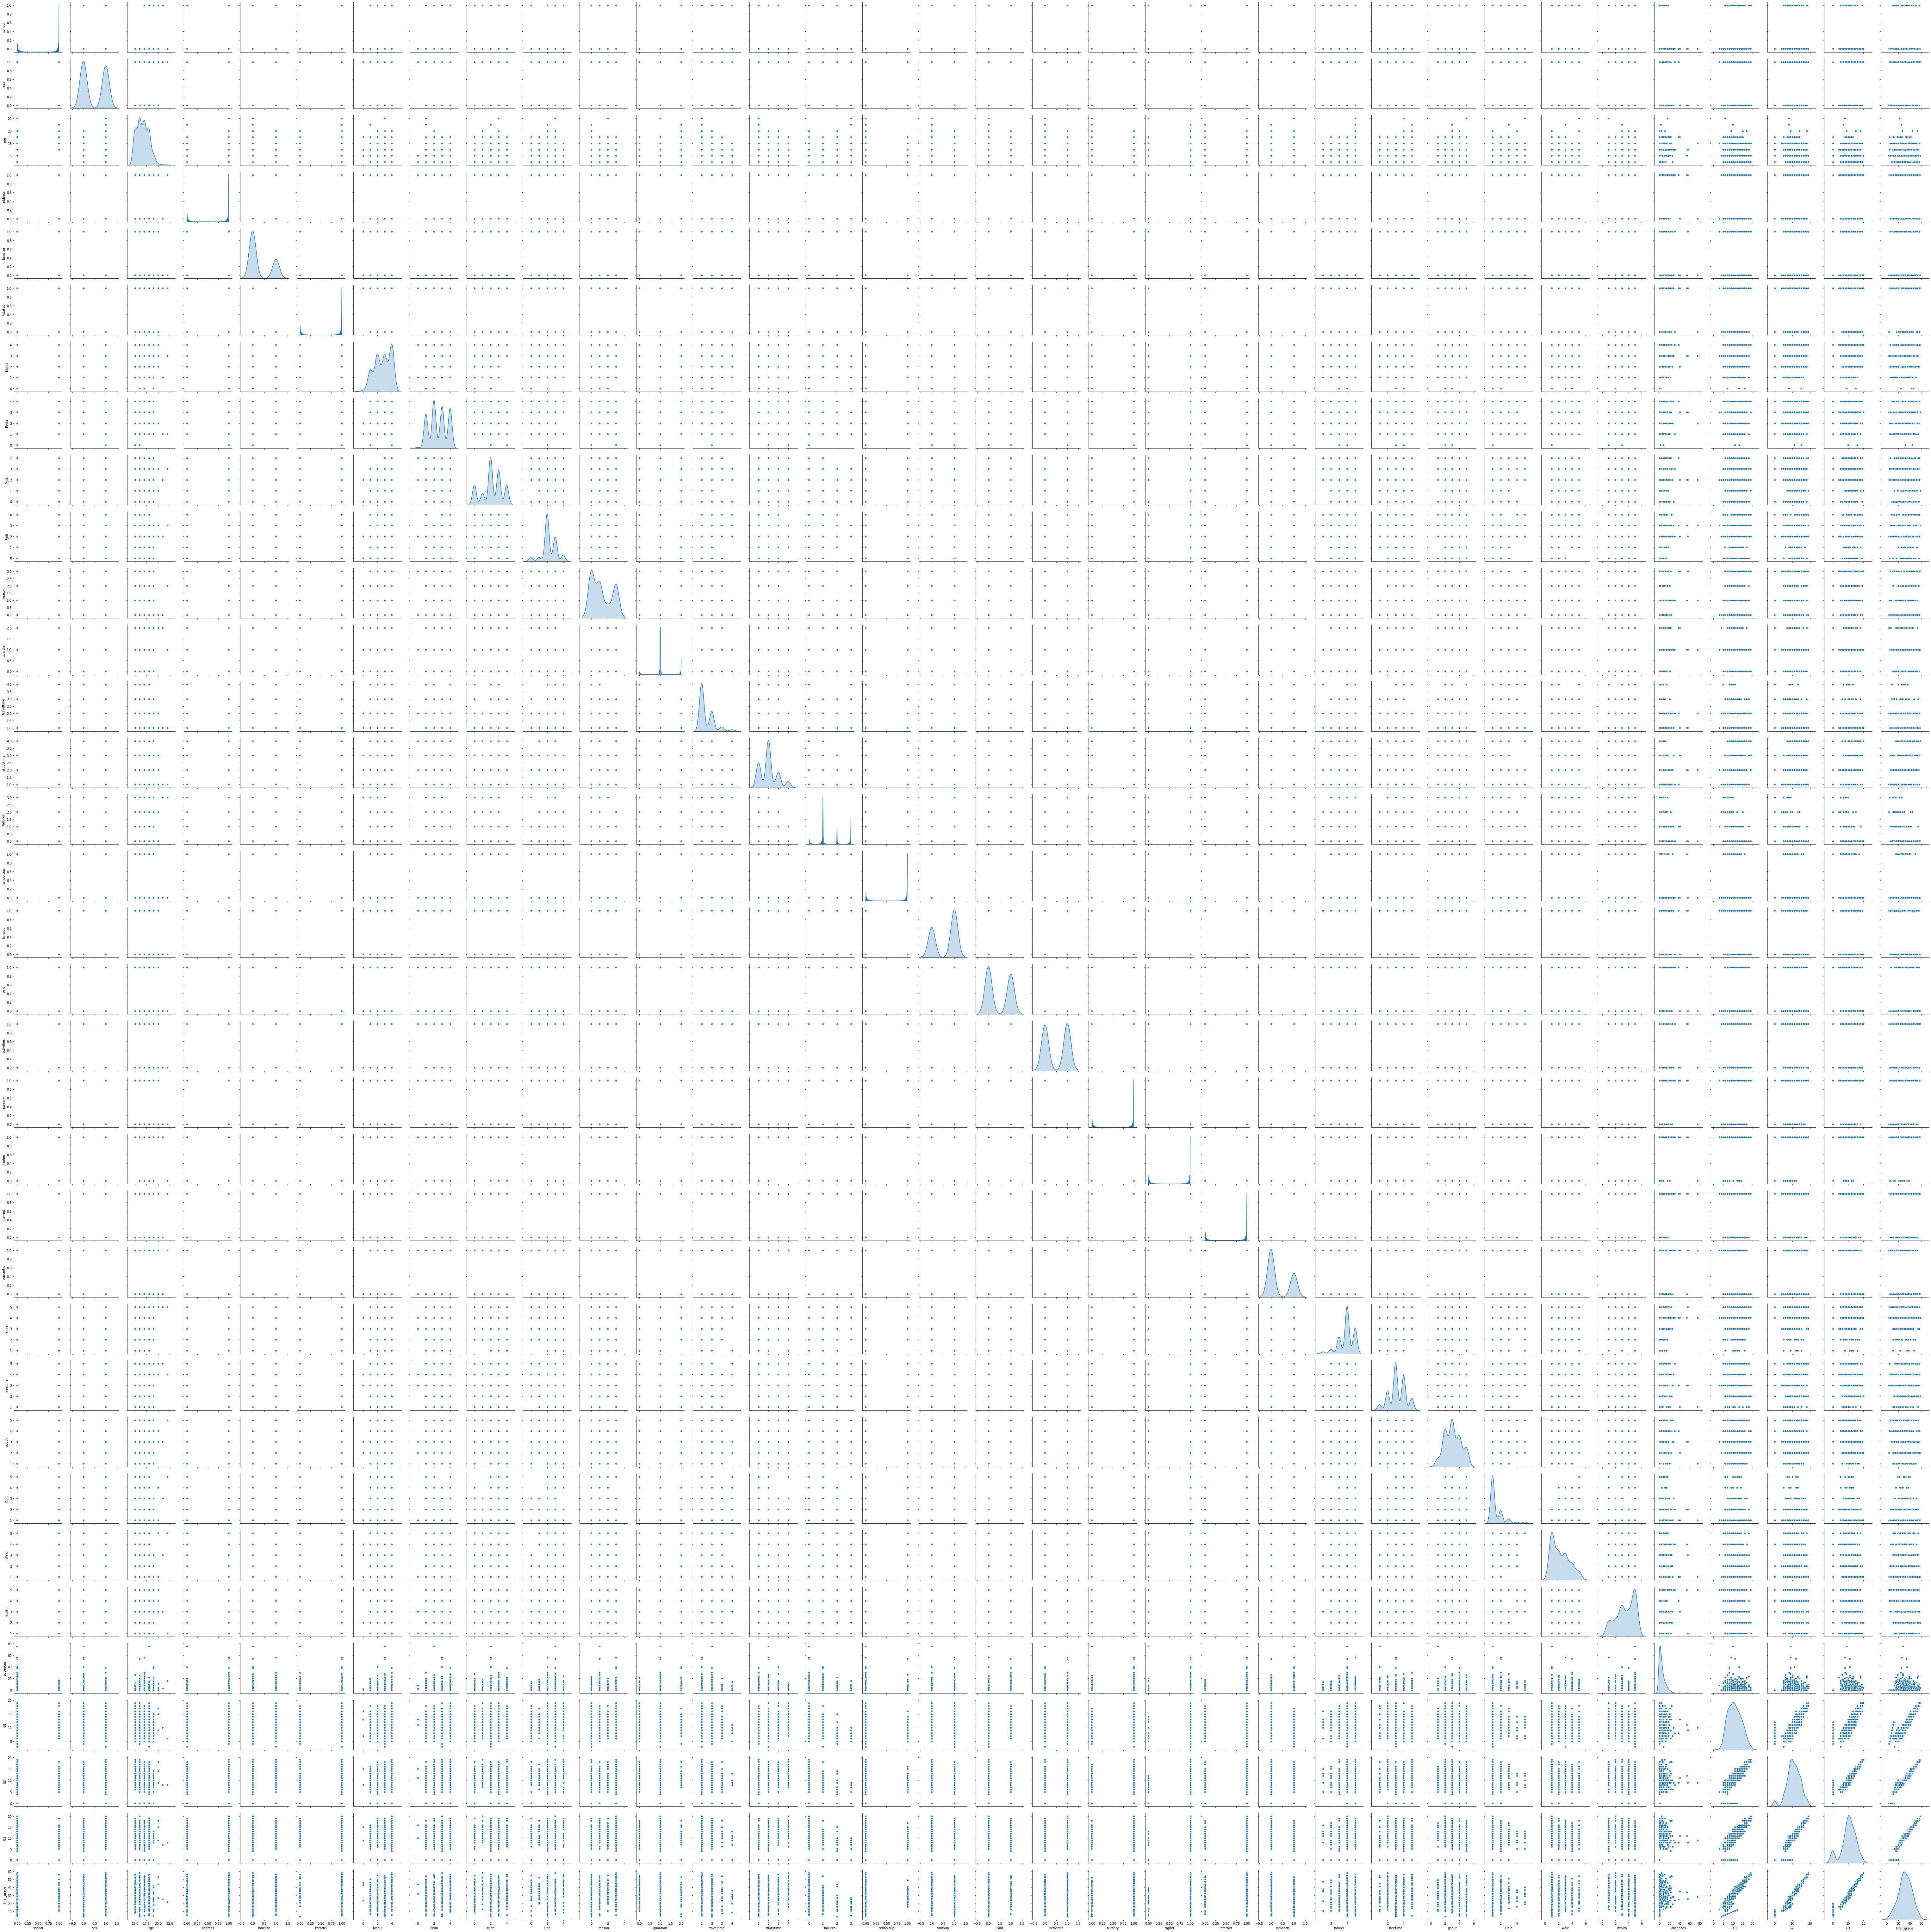

In [109]:
# Additional task 2
# One can also analyze the graph between the dependent and independent variable to check the
# colinearity between them and make some assumptions by applying seaborn.pairplot() 
import seaborn as sns
sns.pairplot(myDataFrame, diag_kind='kde')
plt.show()

In [110]:
# Additional task 3
# What this section means is for every 1unit increase in "school" the "final_grade" is goes up by 0.61 units
# Similarly for every 1unit increase in "age" the final grade drops by -0.25 units
# for every 1unit increase in "G1" the final grade is goes up by 1.15 units and also true for "G2"
# One can also notice from the coefficients that G1 and G2 are the most important attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for school is 0.6119744943388026
The coefficient for sex is 0.16436758560818346
The coefficient for age is -0.25622043794635435
The coefficient for address is -0.13586402846632148
The coefficient for famsize is 0.1896104642735572
The coefficient for Pstatus is -0.03622884779243368
The coefficient for Medu is 0.2430386254823635
The coefficient for Fedu is -0.03196591811328021
The coefficient for Mjob is -0.10577663571483799
The coefficient for Fjob is -0.09287777726879314
The coefficient for reason is 0.13086831493369813
The coefficient for guardian is 0.25191791786578843
The coefficient for traveltime is 0.05896419944750603
The coefficient for studytime is -0.08204123283062884
The coefficient for failures is -0.12405777700079684
The coefficient for schoolsup is -0.08818074102809305
The coefficient for famsup is 0.07298166073661747
The coefficient for paid is 0.049233791039985535
The coefficient for activities is -0.49811887692126394
The coefficient for nursery is -0.132